This notebook is used to check the CaltechBirds SQL dataloader.

It shows the structure of the dataset.attributes dataframe and gives an examples of how the descriptions of concepts can be looked up and how the number of concept ids/concepts can be counted (needed for one-hot encoding).


 

In [1]:
%matplotlib
import torch
import pandas as pd
import os
import numpy as np
import torchvision.transforms as T
import matplotlib.pyplot as plt

from src.DataLoaderSQL import CaltechBirdsDataset

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [4]:
augments =[T.RandomHorizontalFlip(),
           T.RandomVerticalFlip(),
           T.RandomRotation(15)]

dataset = CaltechBirdsDataset(train=False, bounding=True, normalize=False, augments=augments)
birdloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
for data, images in birdloader:
    break


In [3]:
for  images in birdloader:
    print(images.shape)


AttributeError: 'list' object has no attribute 'shape'

In [5]:
data

{'has_bill_shape': [tensor([5])],
 'has_wing_color': [],
 'has_upperparts_color': [],
 'has_underparts_color': [],
 'has_breast_pattern': [],
 'has_back_color': [],
 'has_tail_shape': [],
 'has_upper_tail_color': [],
 'has_head_pattern': [tensor([4])],
 'has_breast_color': [],
 'has_throat_color': [tensor([15])],
 'has_eye_color': [tensor([2])],
 'has_bill_length': [tensor([2])],
 'has_forehead_color': [tensor([13])],
 'has_under_tail_color': [],
 'has_nape_color': [tensor([15])],
 'has_belly_color': [],
 'has_wing_shape': [],
 'has_size': [tensor([1])],
 'has_shape': [tensor([3])],
 'has_back_pattern': [],
 'has_tail_pattern': [],
 'has_belly_pattern': [],
 'has_primary_color': [tensor([15])],
 'has_leg_color': [],
 'has_bill_color': [tensor([15])],
 'has_crown_color': [tensor([15])],
 'has_wing_pattern': []}

In [6]:
lookup.loc[(lookup['concept_name']=='has_bill_shape') & (lookup['concept_id'] == 1.0)]['concept_value'].item() 

NameError: name 'lookup' is not defined

In [6]:
torch.isnan(data['has_back_color'])[3].item() == False

True

AttributeError: 'CaltechBirdsDataset' object has no attribute 'attributes'

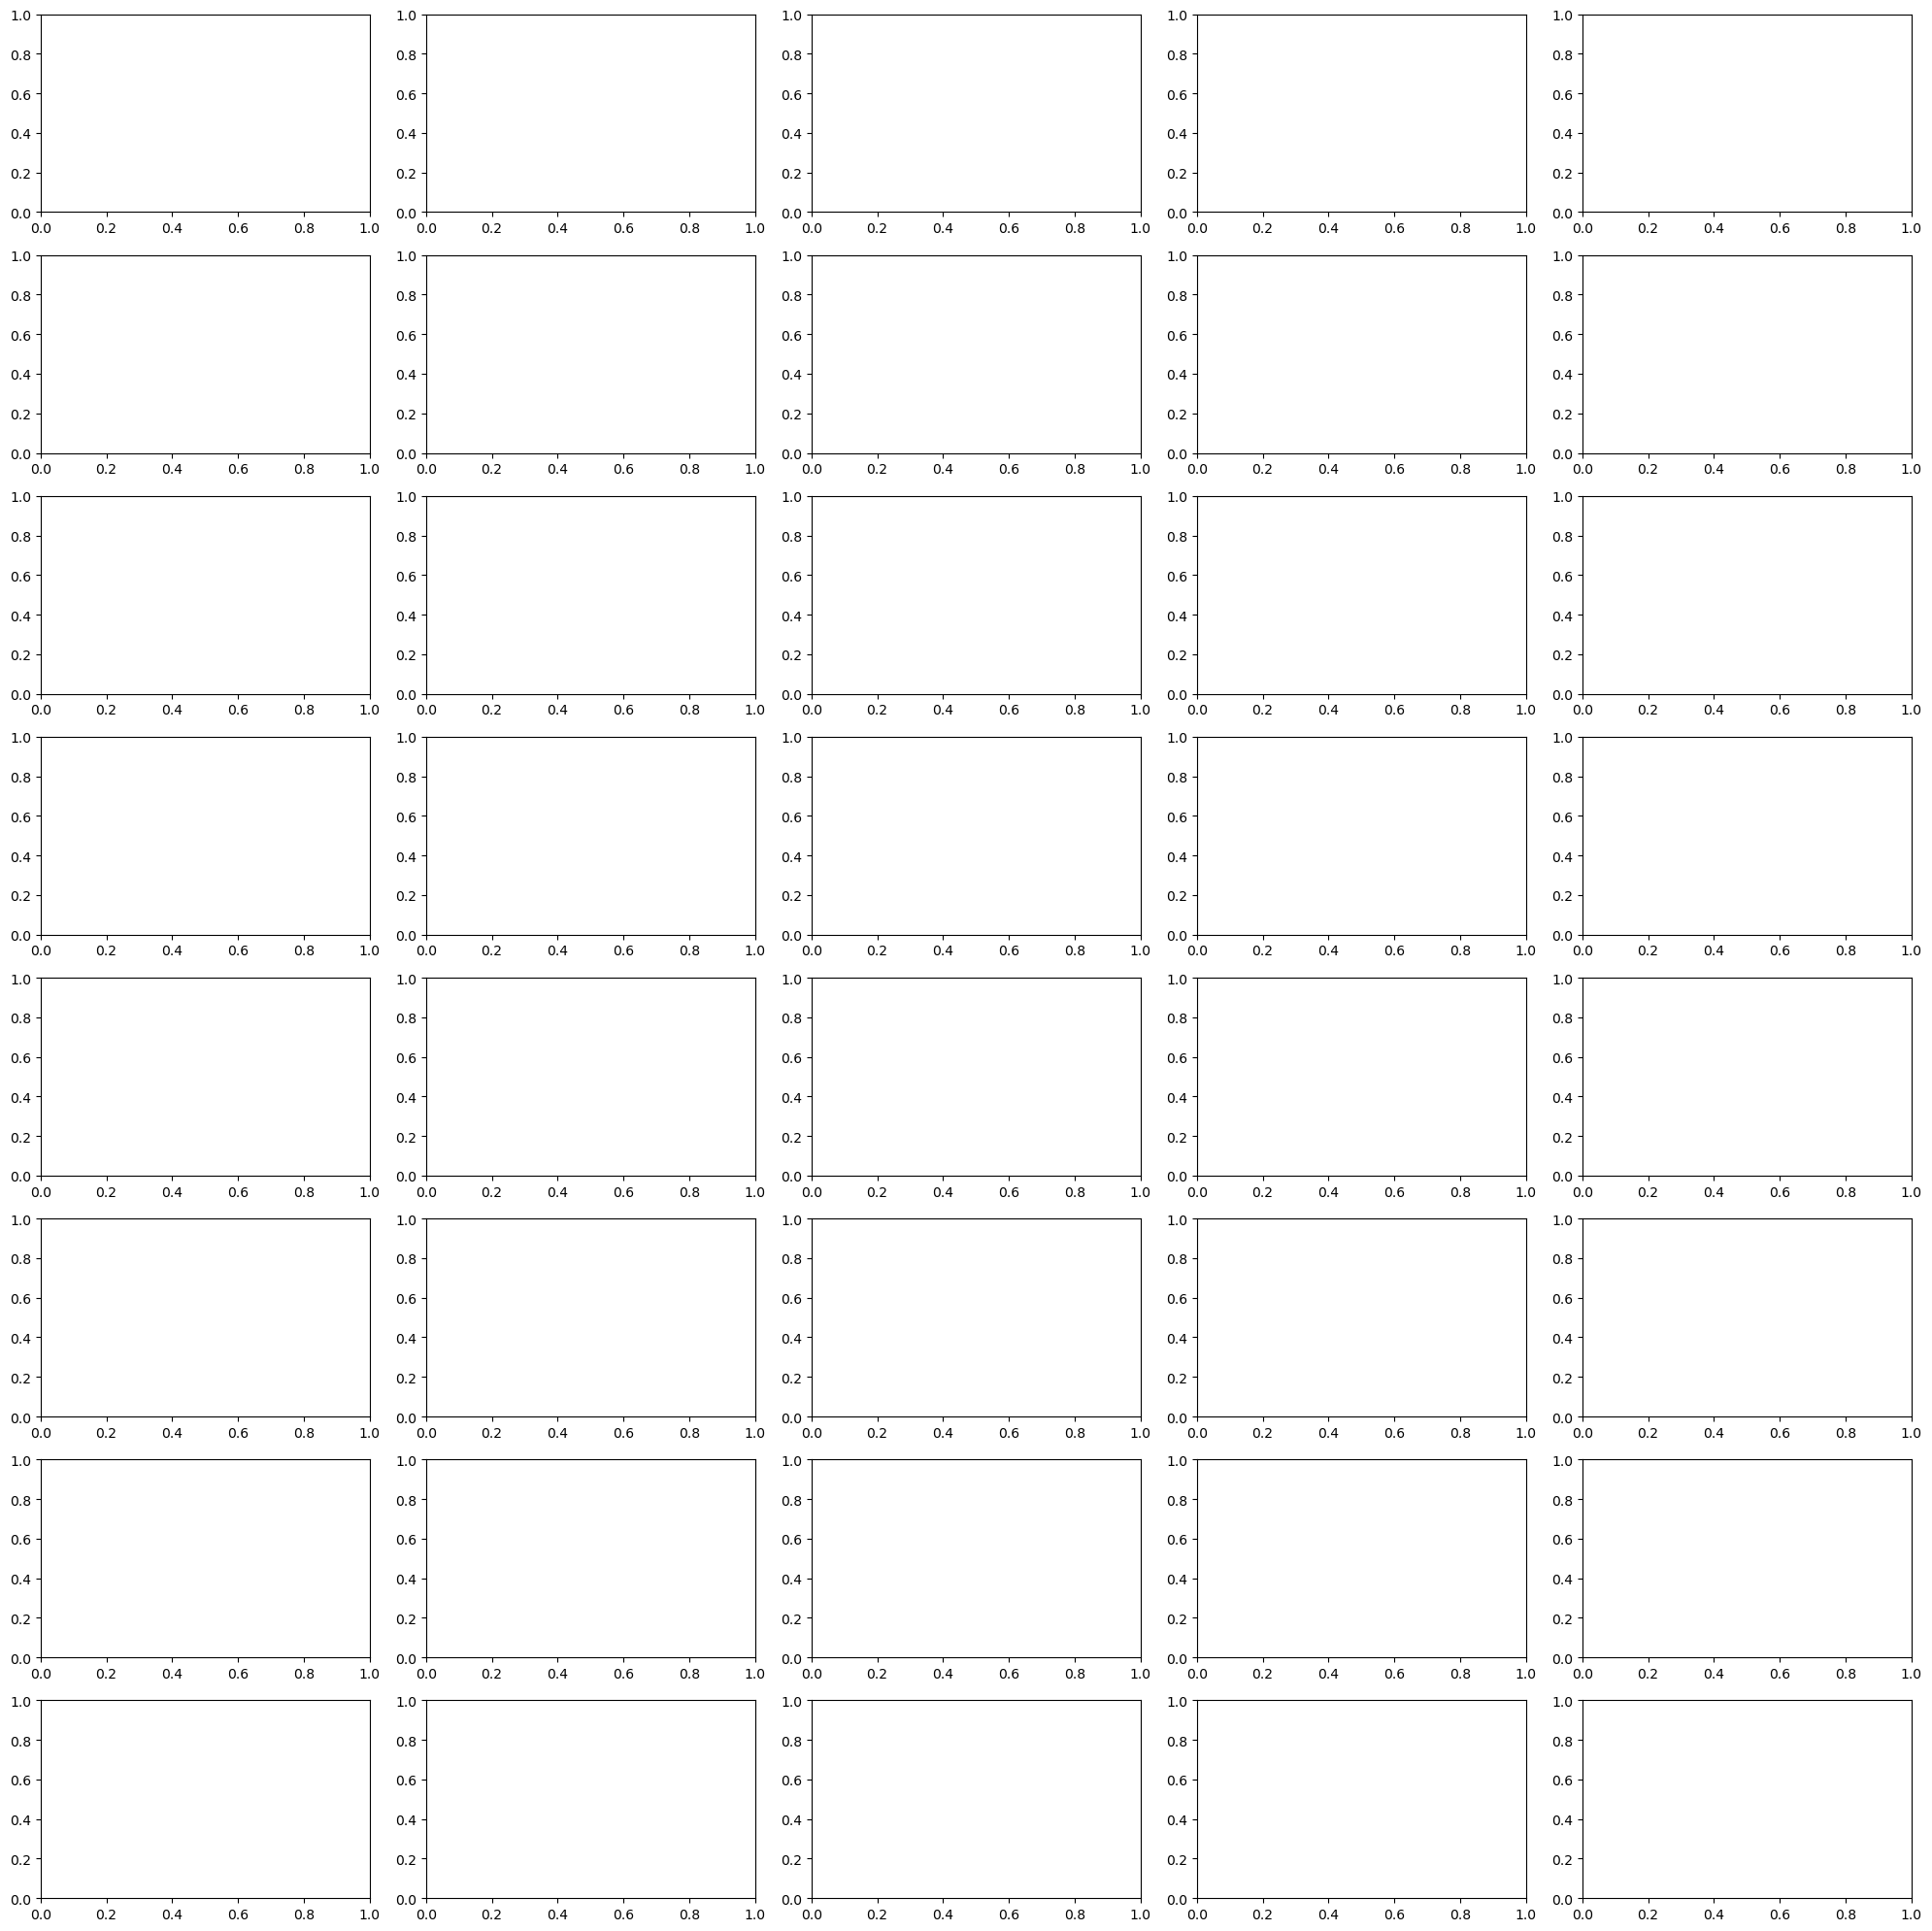

In [7]:
fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(20, 20), layout='tight')

transform = T.ToPILImage()
resize = (224,224)

lookup = dataset.attributes

for i in range(8):    
    
    class_id   = data['class_id'][i].item()
    file_name  = data['file_name'][i]
    ax[i][0].set_axis_off()   
    ax[i][0].set_title(file_name)  
    original = transform(images[i])
    ax[i][0].imshow(original)
    
    #attributes_list  = attributes[i].tolist()
    #certainties_list = certainties[i].tolist()
    
    concept_descriptions = ["", "", "", ""]
    
    line_number = 0 
    for k, concept_name  in enumerate(dataset.concept_names):
        
        concept_value_id     = data[concept_name][i].item()
        
        if concept_value_id == 99:
            concept_value_description = 'Unknown'
        else:
            concept_value_description = (lookup.loc[(lookup['concept_name']==concept_name) & 
                                                   (lookup['concept_id'] == np.float64(concept_value_id))]['concept_value'].item()) 
            
        concept_descriptions[line_number // 9] += concept_name + ':  ' + concept_value_description  + '\n'
        line_number += 1
        
#         certainty = certainties_list[j]
#         attribute_id = j + 1
#         if attribute == 1:
#             pass
#             attribute_description = data.attributes.loc[attribute_id]['attribute_name']
#             certainty_description = data.certainties.loc[certainty]['certainty_name']
#             if line_count < 48:
#                 attribute_descriptions[line_count // 12] +=  str(attribute_id) + ": " + attribute_description + " " + certainty_description + "\n"
#                 line_count += 1

    for j in range(4):
        ax[i][j+1].set_axis_off() 
        ax[i][j+1].set_ylim(0,1)

        ax[i][j+1].text(0, 0, concept_descriptions[j], fontsize=12) 
   
        
 
fig.show()

In [8]:
for name in dataset.concept_names:
    print(name, len(lookup.loc[(lookup['concept_name']==name)]) )

has_bill_shape 10
has_wing_color 16
has_upperparts_color 16
has_underparts_color 16
has_breast_pattern 5
has_back_color 16
has_tail_shape 7
has_upper_tail_color 16
has_head_pattern 12
has_breast_color 16
has_throat_color 16
has_eye_color 15
has_bill_length 4
has_forehead_color 16
has_under_tail_color 16
has_nape_color 16
has_belly_color 16
has_wing_shape 6
has_size 6
has_shape 15
has_back_pattern 5
has_tail_pattern 5
has_belly_pattern 5
has_primary_color 16
has_leg_color 16
has_bill_color 16
has_crown_color 16
has_wing_pattern 5
